In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("/nfs/turbo/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl")
from travel import init_travel
init_travel()

In [11]:
import torch
from transformers import pipeline, BitsAndBytesConfig

# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     llm_int8_threshold=6.0,
#     llm_int8_has_fp16_weight=False,
#     bnb_4bit_compute_dtype=torch.bfloat16,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
# )
# model_kwargs = {"quantization_config": bnb_config}
model_kwargs = {}
generator =  pipeline("mask-generation", model="facebook/sam-vit-base", device=0, points_per_batch = 256, model_kwargs=model_kwargs)
!nvidia-smi

Sun Jul 14 17:04:40 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:1E:00.0 Off |                    0 |
|  0%   41C    P0             78W /  300W |    1212MiB /  46068MiB |      0%   E. Process |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
from PIL import Image

images = [
    Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_multiframe_partition3of4/da32ff6e-27b2-47e6-b38f-dbf7a36b5f4d/70/easyneg_MisalignSRL_V_ARG1_898afb02-0bde-4fe7-81f8-645b94ac4899_4034.461679999999/frames/frame_da32ff6e-27b2-47e6-b38f-dbf7a36b5f4d-70-easyneg_MisalignSRL_V_ARG1_898afb02-0bde-4fe7-81f8-645b94ac4899_4034.461679999999_3.jpg"),
    Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_multiframe_partition1of4/79c62f24-488e-4a69-8220-3b20cb4bf72b/398/easyneg_MisalignSRL_V_ARG1_c8f8ebf1-5613-4f4a-802c-ada5e4c4b651_326.6214286/frames/frame_79c62f24-488e-4a69-8220-3b20cb4bf72b-398-easyneg_MisalignSRL_V_ARG1_c8f8ebf1-5613-4f4a-802c-ada5e4c4b651_326.6214286_3.jpg"),
    Image.open("/home/sstorks/coe-chaijy/sstorks/simulation_informed_pcr4nlu/TRAVEl_cache_dir/ego4d_val_seed222_mismatch_multiframe_partition1of4/5b97f47f-f015-46f3-8879-3fcc2a61a728/177/easyneg_MisalignSRL_ARG1_2dbdd409-0be0-447c-8ae8-3f107fe9af80_152.6393286/frames/frame_5b97f47f-f015-46f3-8879-3fcc2a61a728-177-easyneg_MisalignSRL_ARG1_2dbdd409-0be0-447c-8ae8-3f107fe9af80_152.6393286_1.jpg"),    
]

In [ ]:
from pprint import pprint

outputs = generator(images, points_per_batch = 256)
# pprint(outputs)

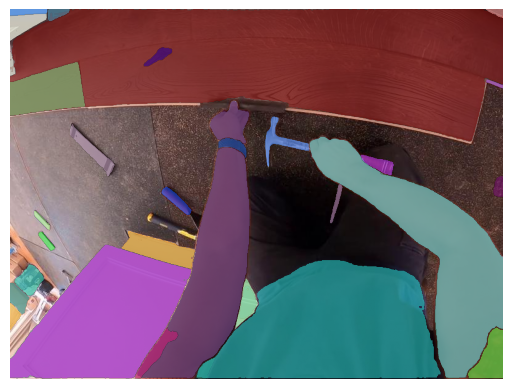

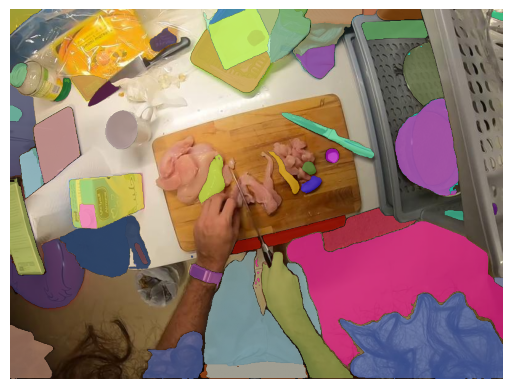

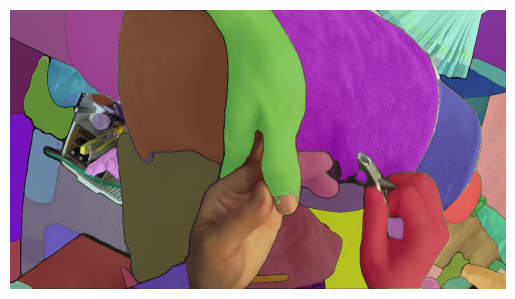

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
for output, img in zip(outputs, images):
    plt.imshow(np.array(img))
    ax = plt.gca()
    for mask in output["masks"]:
        show_mask(mask, ax=ax, random_color=True)
    plt.axis("off")
    plt.show()